# Magnetically Modelling MagSafe - 2D Animation

This is the code referred to in my blog post ->  https://kavi.sblmnl.co.za/magnetically-modelling-magsafe/

In [1]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
import numpy as np

In [2]:
def force_vector(m1,m2,r):
  # force of magnetic dipole m1 on m2, r is from m1 to m2
  # implements equation from here -> https://en.wikipedia.org/wiki/Force_between_magnets#Magnetic_dipole%E2%80%93dipole_interaction

  mu0 = 1.256e-6
  rmag = np.linalg.norm(r)
  a1 = 3*mu0/(4*np.pi*rmag**5)

  a2 = np.dot(m1,r)*m2
  a3 = np.dot(m2,r)*m1
  a4 = np.dot(m1,m2)*r
  a5 = 5*r*(np.dot(m1,r)*np.dot(m2,r))/(rmag)

  return a1*(a2+a3+a4-a5)

In [3]:
def add_force_to_magsafe_array_2(ma1,ma2):
  # adds forces to magnetic dipoles in ma2
  #ma1 -> [[position_x, position_y, dipole_moment_x, dipole_moment_y],...]
  #ma2 -> [[position_x, position_y, dipole_moment_x, dipole_moment_y, force_x, force_y],...]

  f1 = 0
  f2 = 0
  j = 0

  for x in ma2: #iterates over ma2
    for y in ma1: #for each ma2 dipole, calculates and sums all forces caused by interaction with ma1 dipoles
      f1 = f1 + force_vector(np.array([x[2],x[3]]),np.array([y[2],y[3]]),np.array([x[0]-y[0],x[1]-y[1]]))[0]
      f2 = f2 + force_vector(np.array([x[2],x[3]]),np.array([y[2],y[3]]),np.array([x[0]-y[0],x[1]-y[1]]))[1]
    ma2[j][4] = f1
    ma2[j][5] = f2
    f1 = 0
    f2 = 0
    j = j + 1

  return ma2

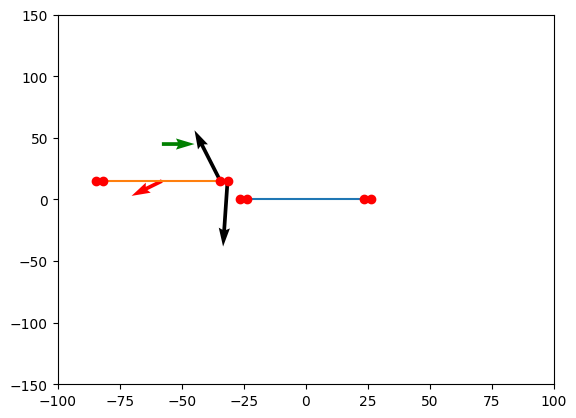

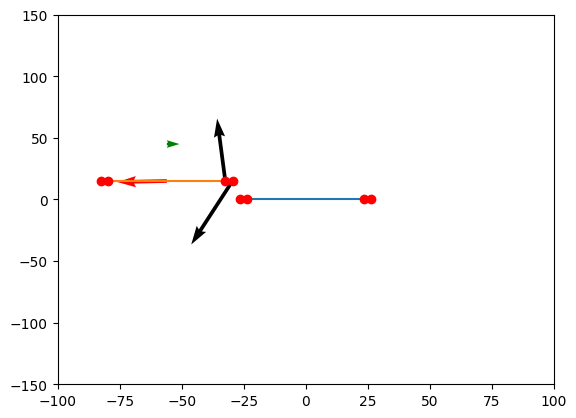

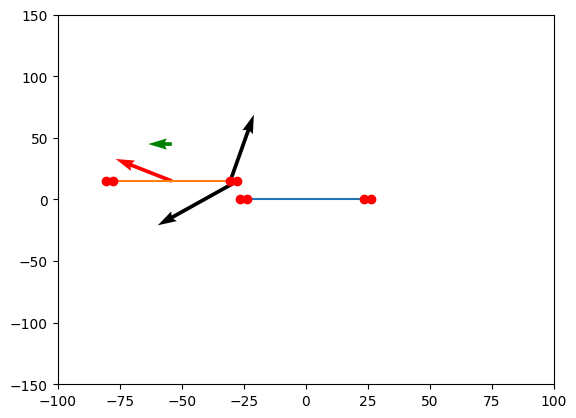

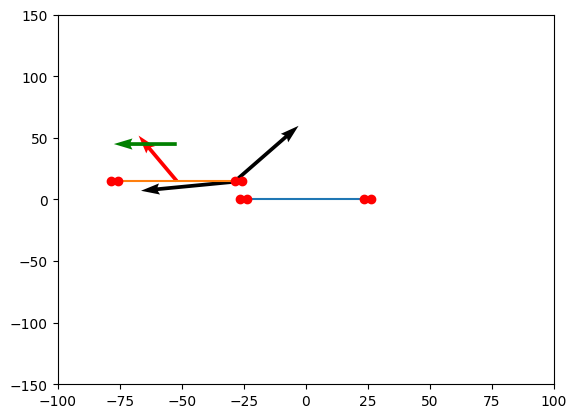

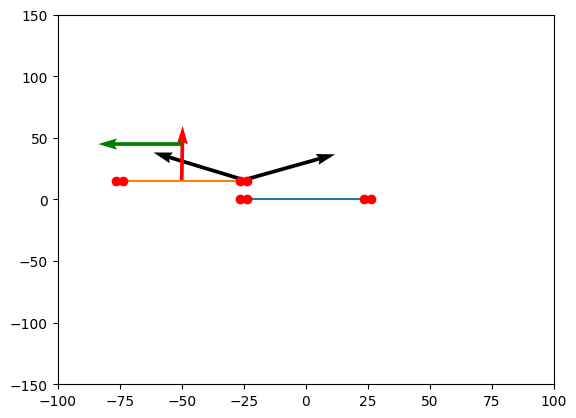

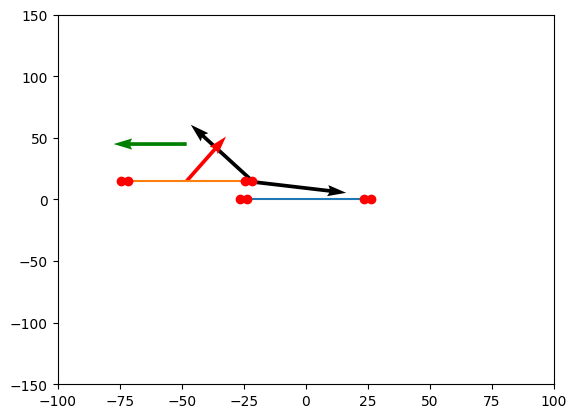

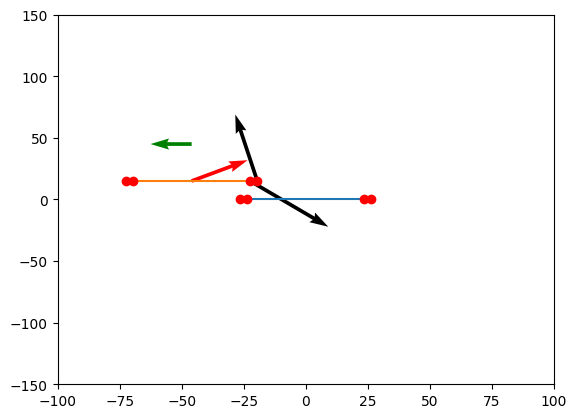

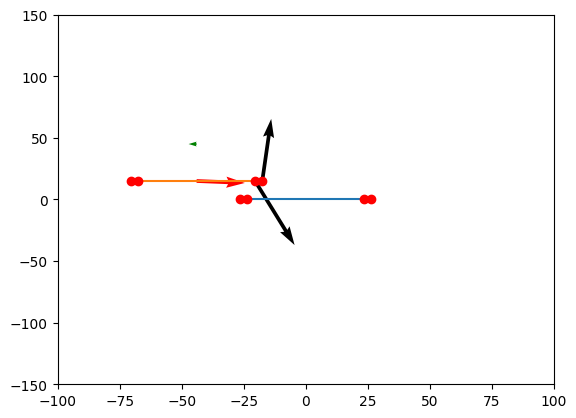

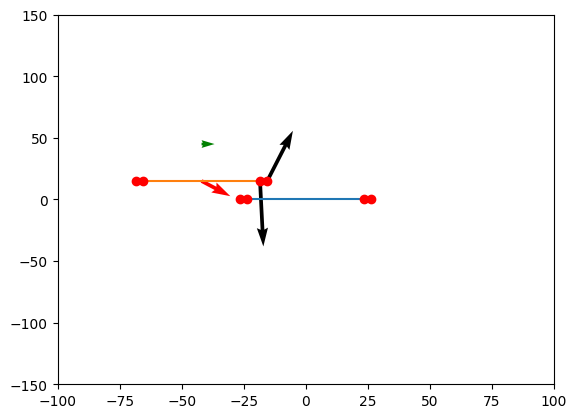

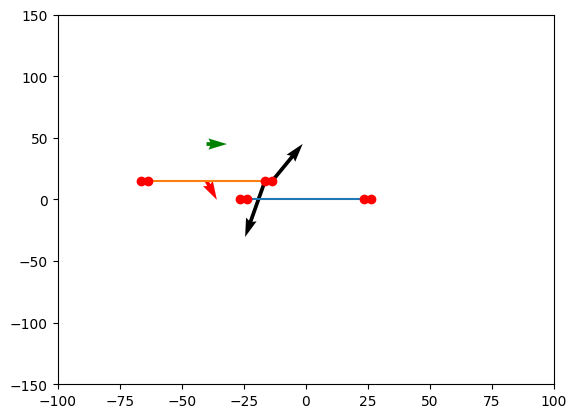

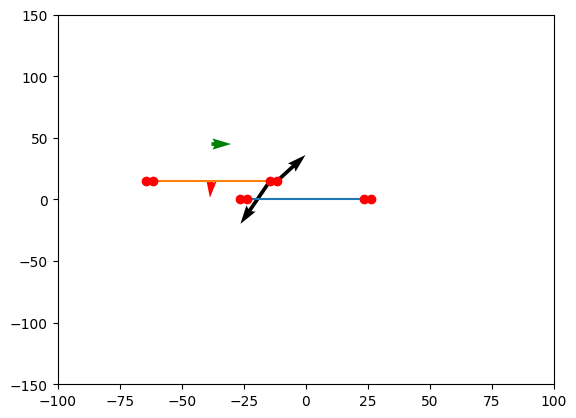

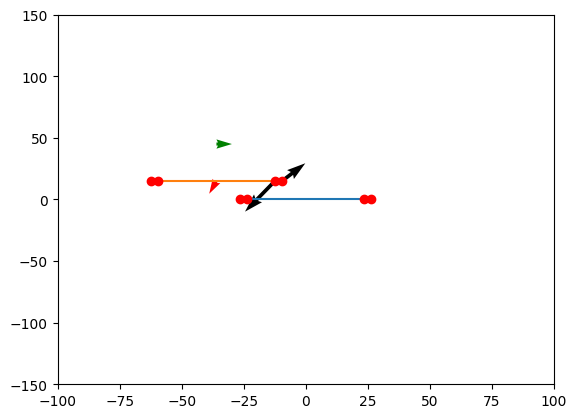

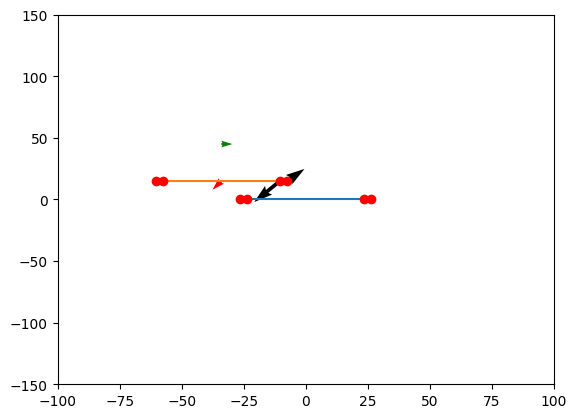

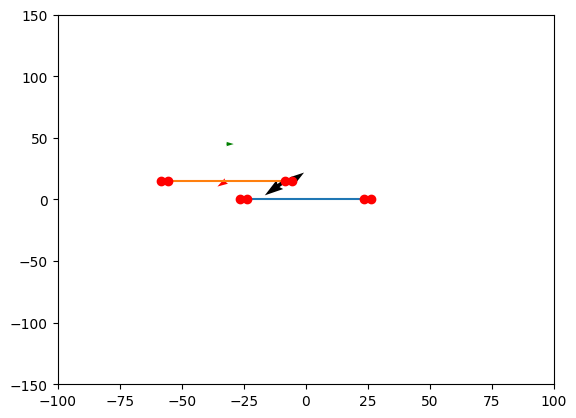

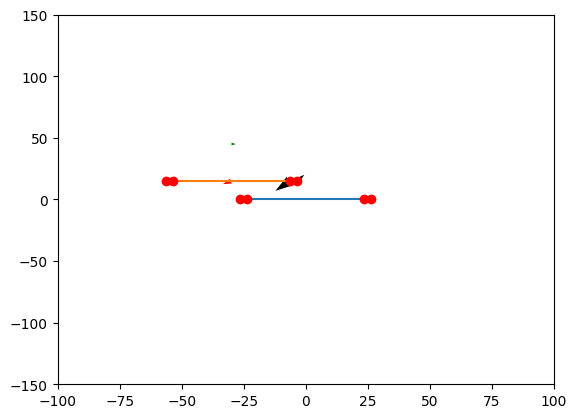

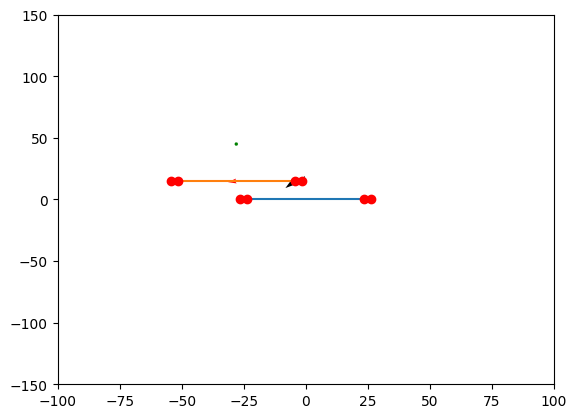

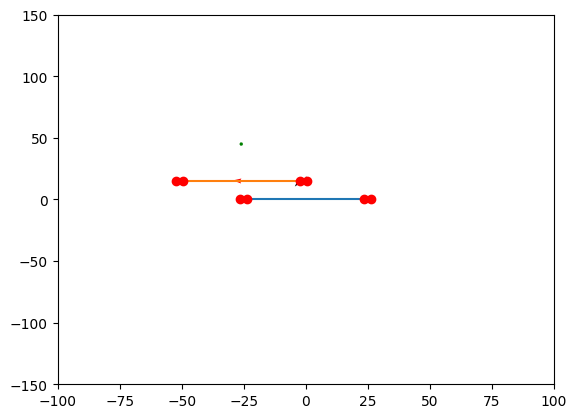

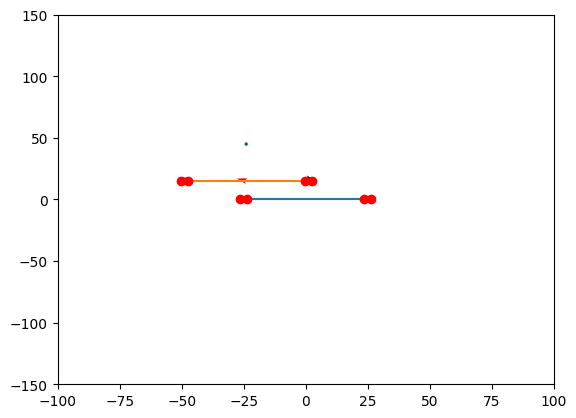

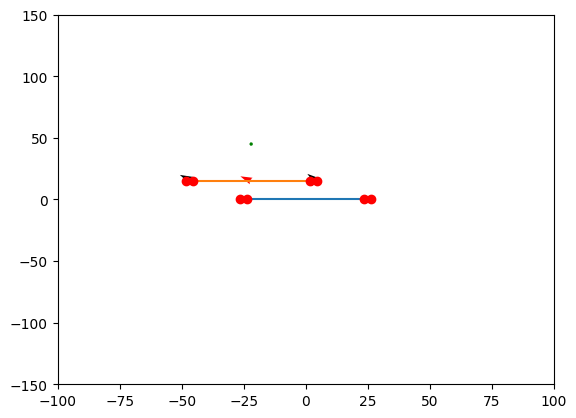

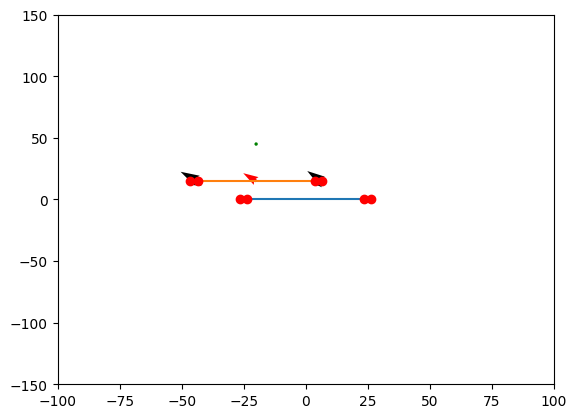

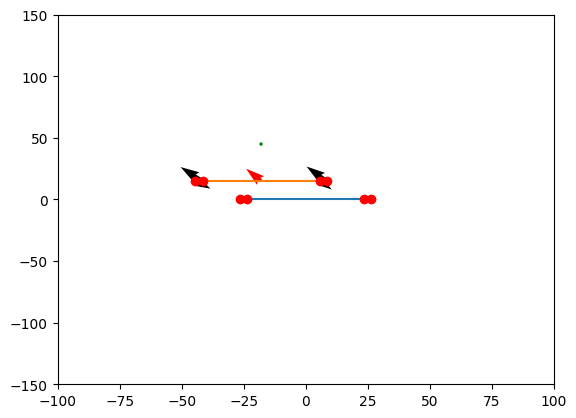

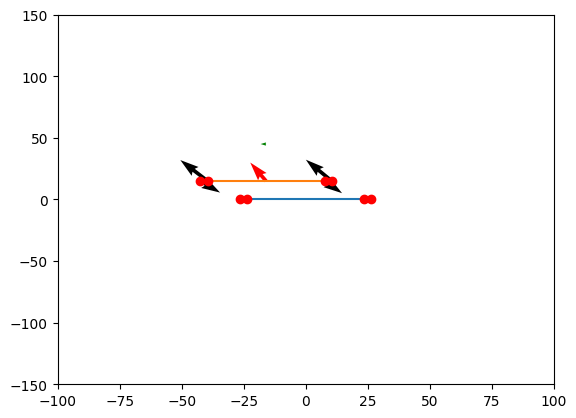

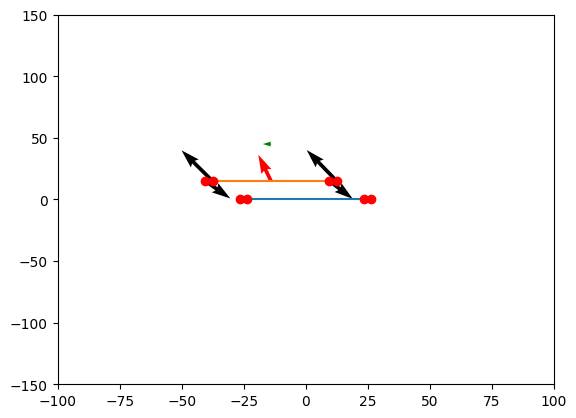

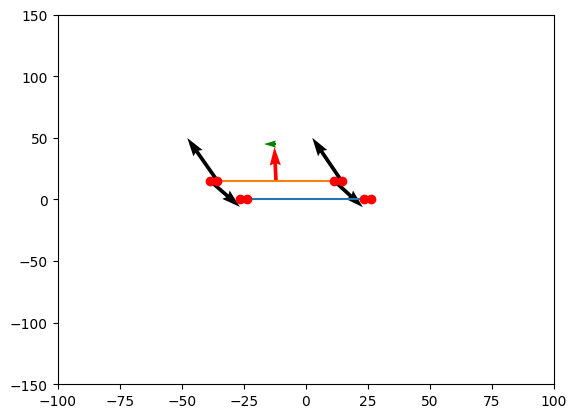

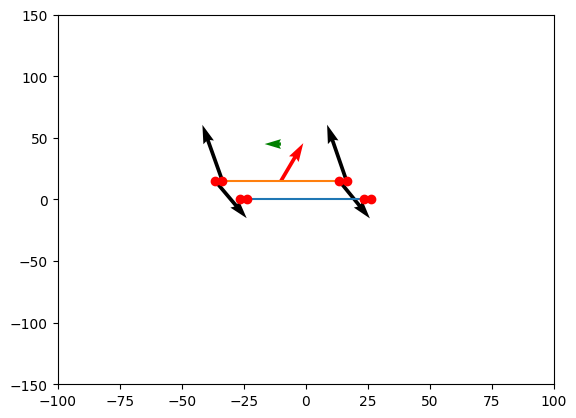

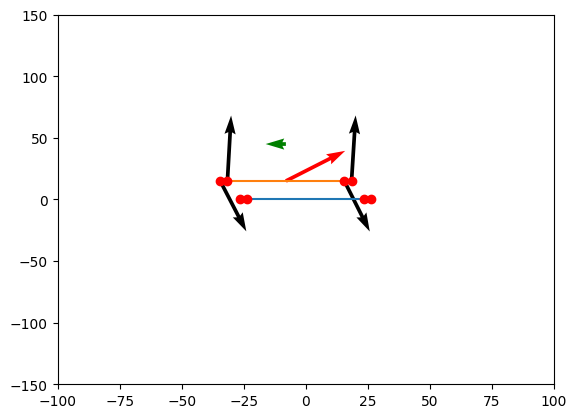

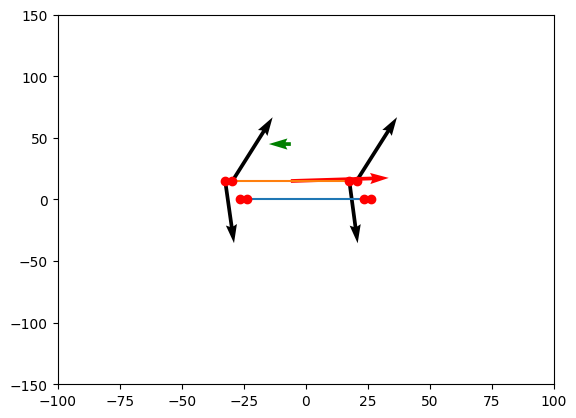

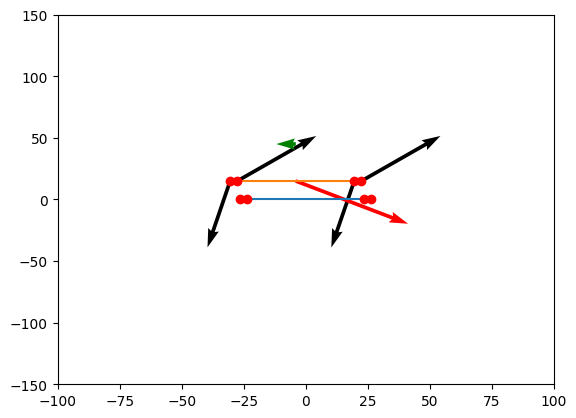

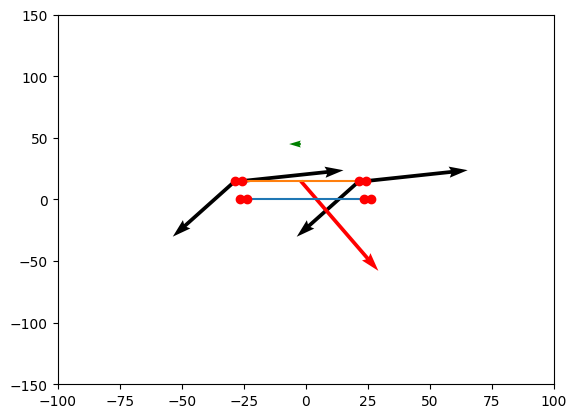

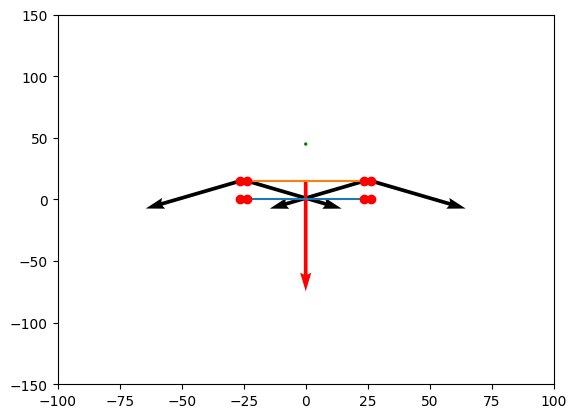

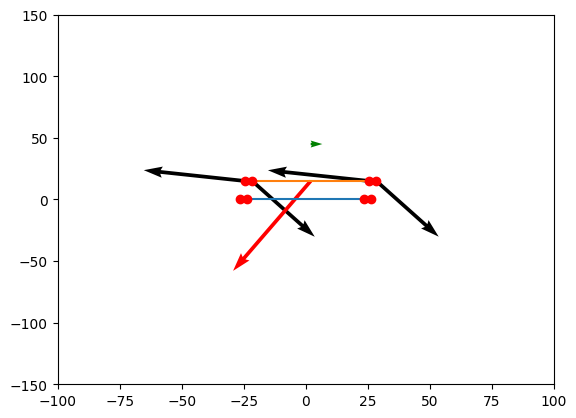

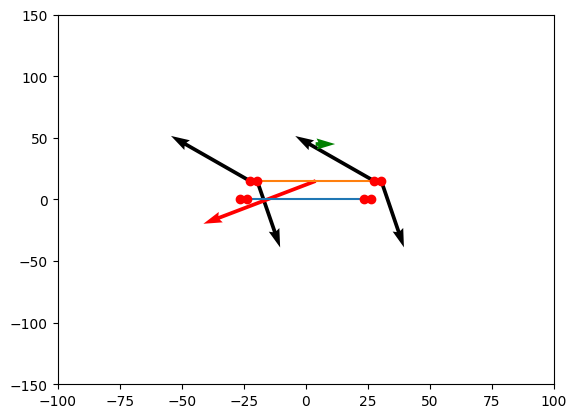

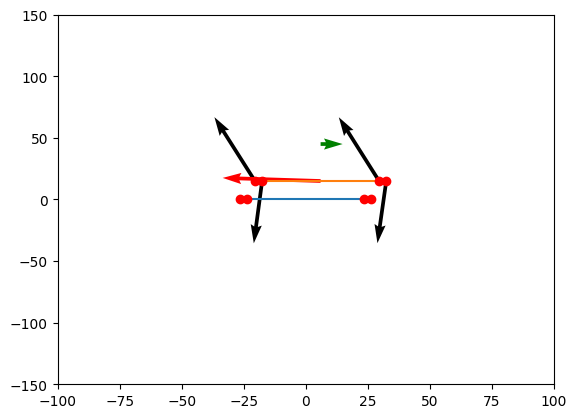

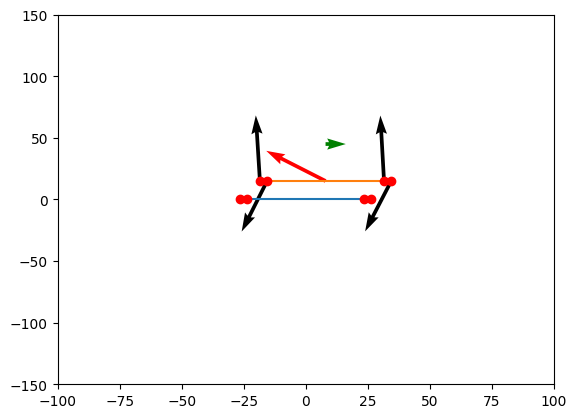

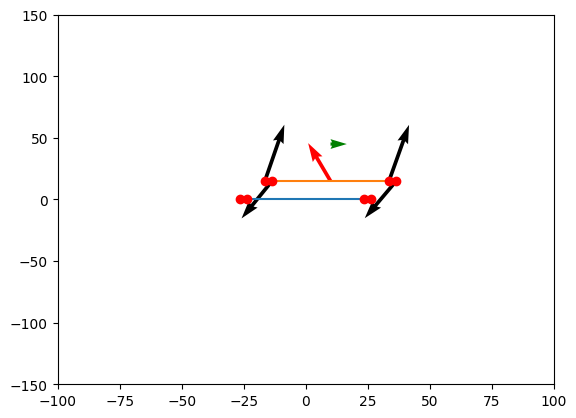

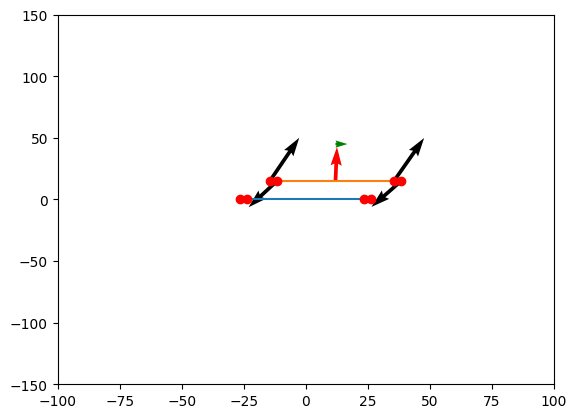

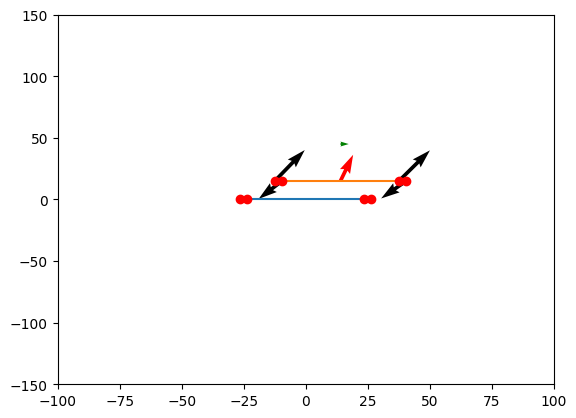

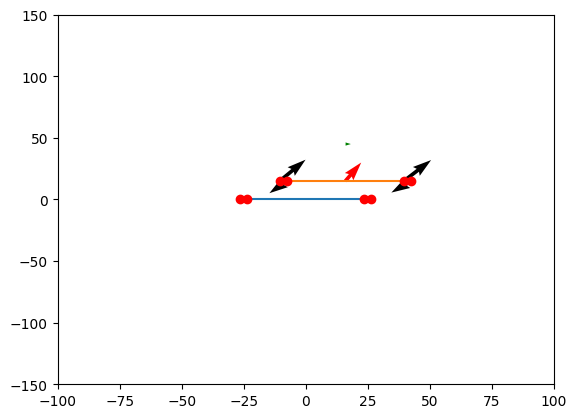

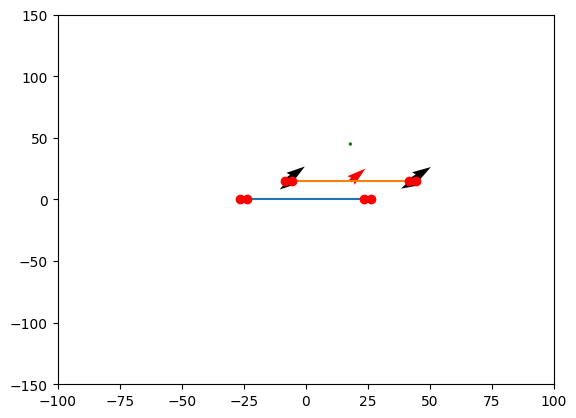

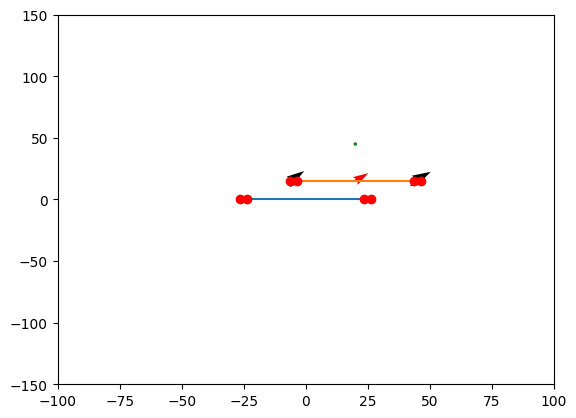

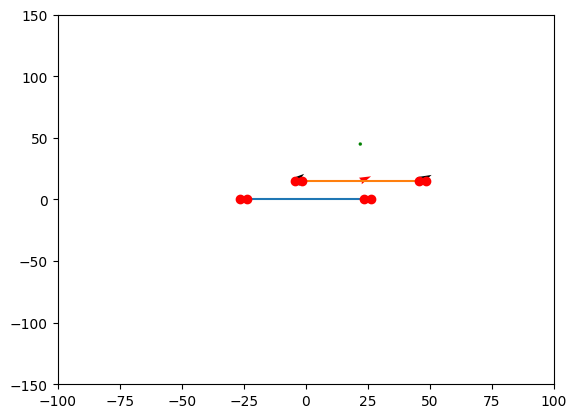

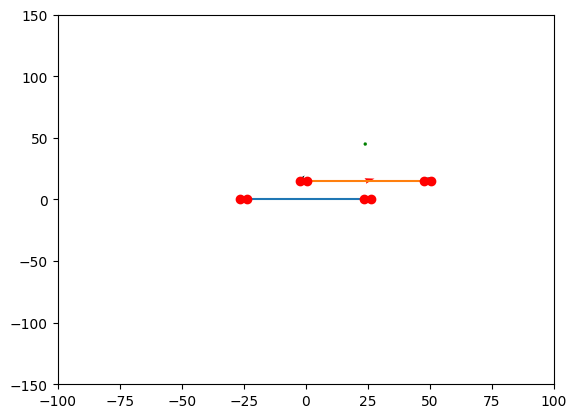

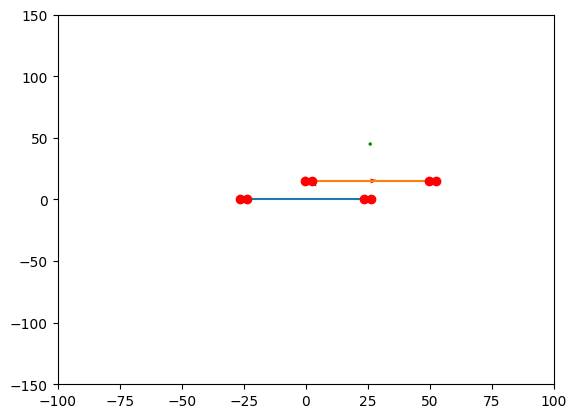

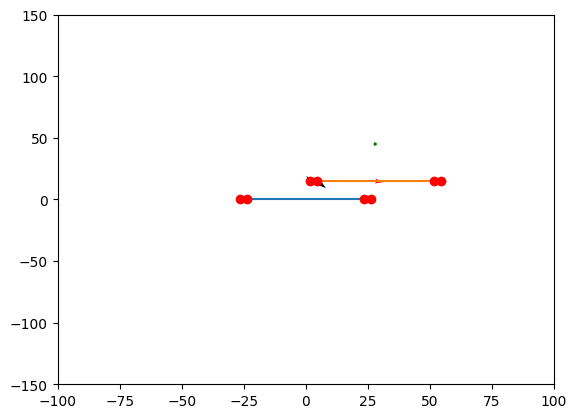

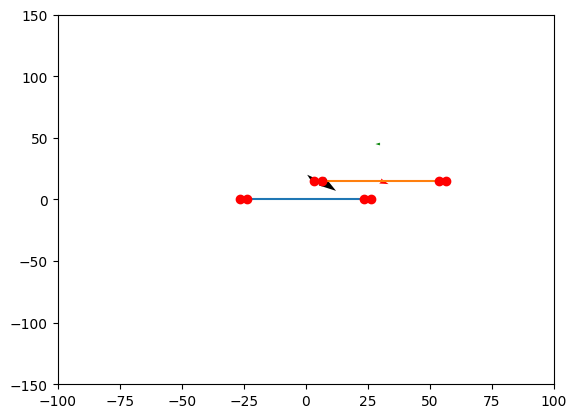

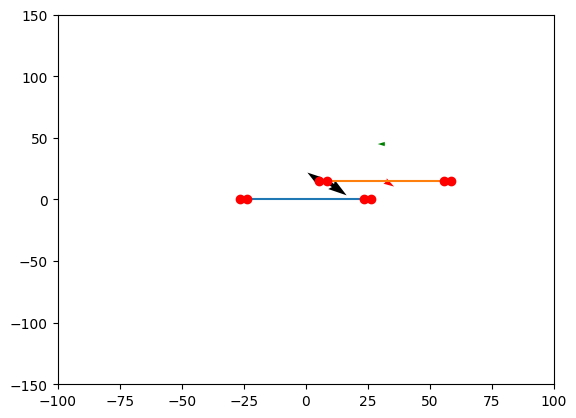

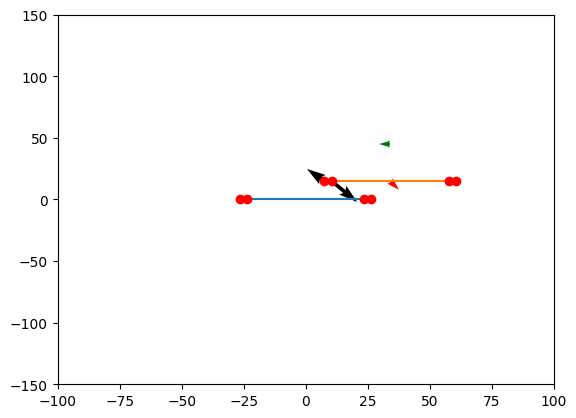

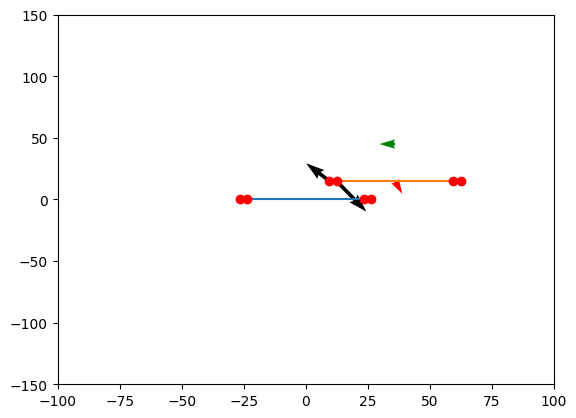

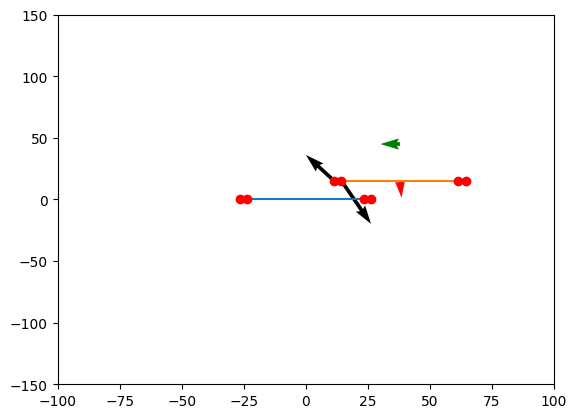

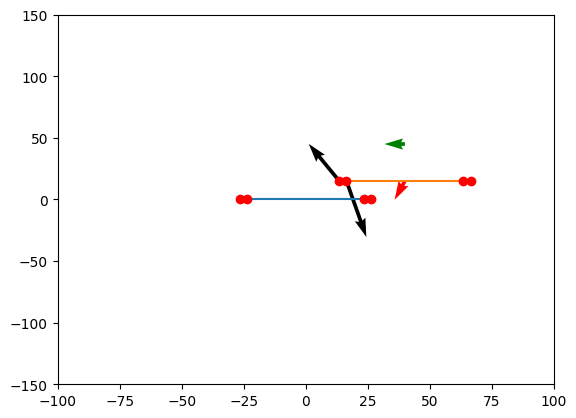

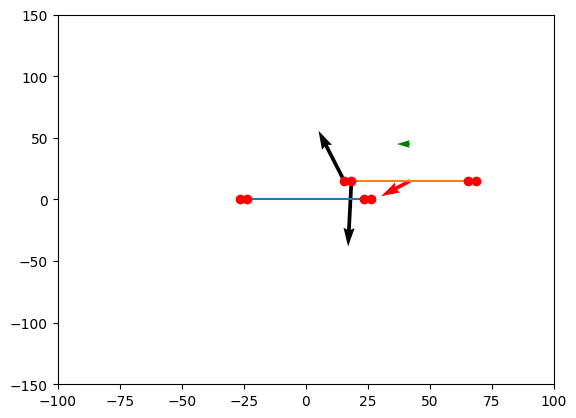

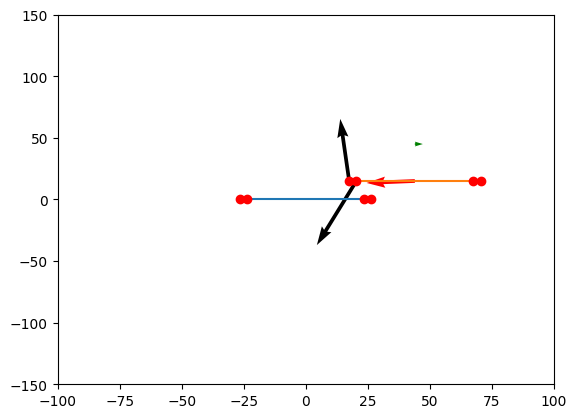

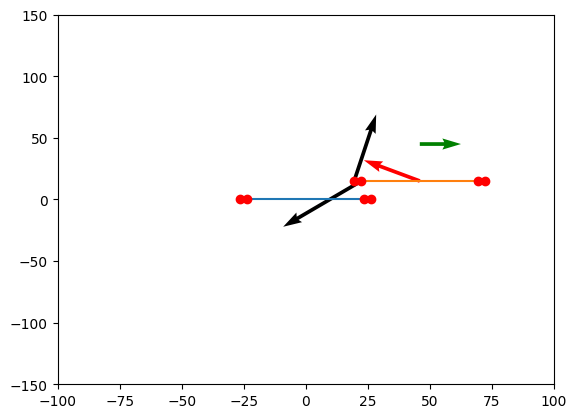

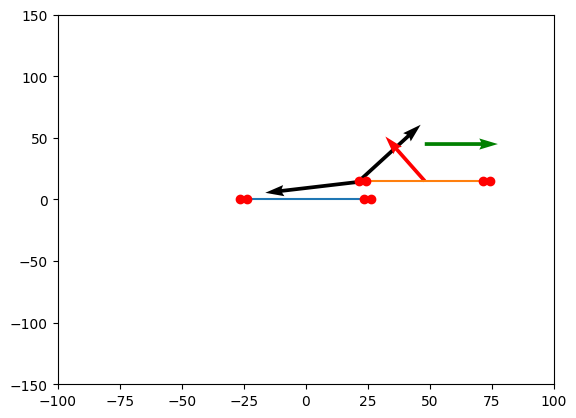

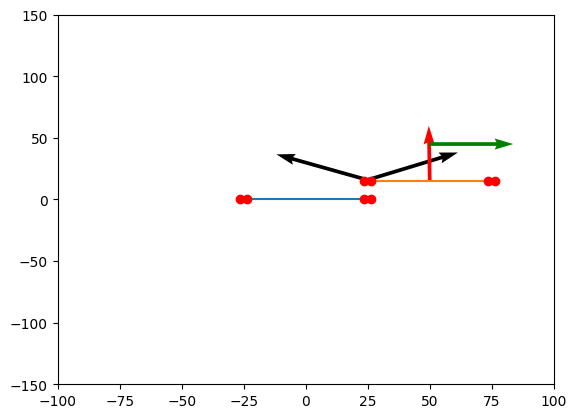

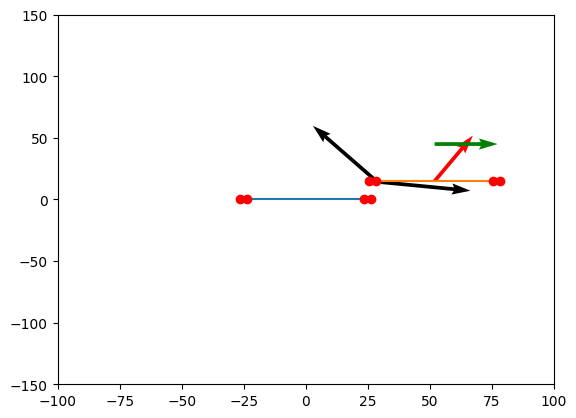

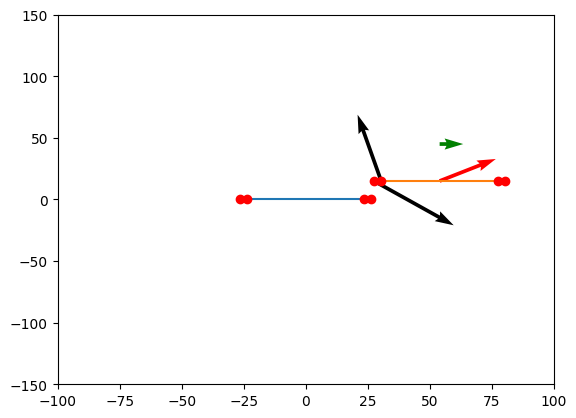

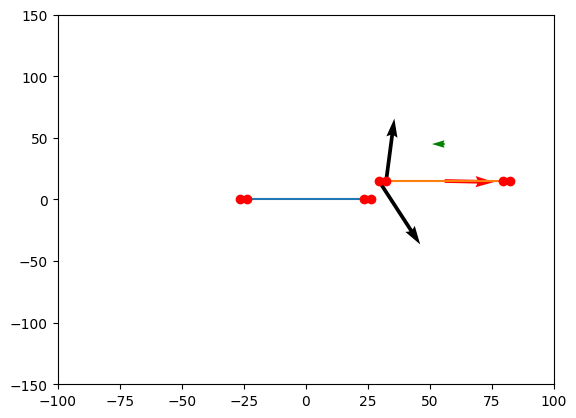

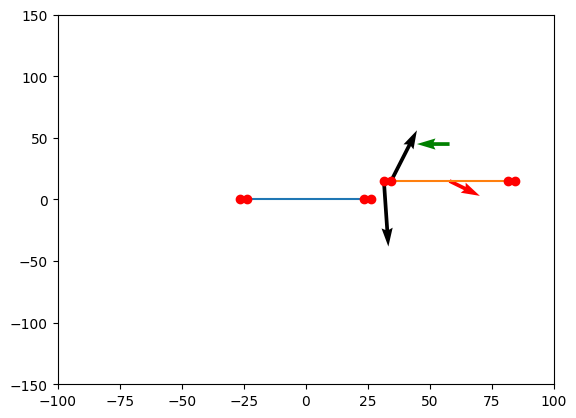

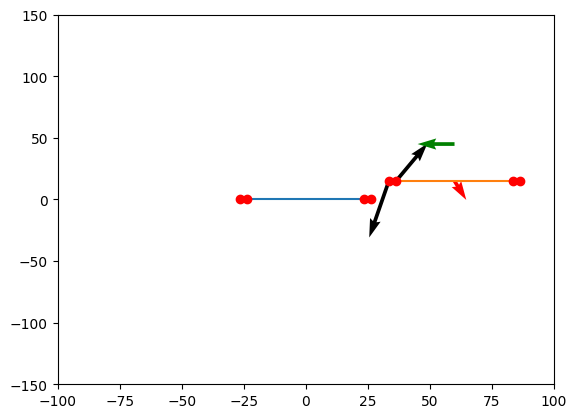

In [4]:
inner_r1 = 23     #mm
inner_r2 = 24.15  #mm
outer_r1 = 25.9   #mm
outer_r2 = 27.05  #mm
thickness = 0.55  #mm

inner_r = (inner_r1+inner_r2)/2.0
outer_r = (outer_r1+outer_r2)/2.0

mag_dip_mom = np.array([0,1]) #Magnetic Dipole Moment of all points

#Defines starting position of magsafe_array_2
y_offset = 15
x_offset = -60

for i in range(0, 60):
    #clear_output(wait=True) #clears the output, comment out to print all frames

    #Defines movement of magsafe_array_2 in i steps
    y_offset = y_offset #- 0.25
    x_offset = x_offset + 2

    #magsafe_array_1 -> [[position_x, position_y, dipole_moment_x, dipole_moment_y],...]
    #magsafe_array_2 -> [[position_x, position_y, dipole_moment_x, dipole_moment_y, force_x, force_y],...]

    magsafe_array_1 = np.array([    # << fixed array (bottom)
        [-1*outer_r,0,mag_dip_mom[0],mag_dip_mom[1]],
        [-1*inner_r,0,-mag_dip_mom[0],-mag_dip_mom[1]],
        [inner_r,0,-mag_dip_mom[0],-mag_dip_mom[1]],
        [outer_r,0,mag_dip_mom[0],mag_dip_mom[1]]
        ])

    magsafe_array_2 = np.array([    # << moving array (top)
        [-1*outer_r+x_offset,y_offset,mag_dip_mom[0],mag_dip_mom[1],0,0],
        [-1*inner_r+x_offset,y_offset,-mag_dip_mom[0],-mag_dip_mom[1],0,0],
        [inner_r+x_offset,y_offset,-mag_dip_mom[0],-mag_dip_mom[1],0,0],
        [outer_r+x_offset,y_offset,mag_dip_mom[0],mag_dip_mom[1],0,0],
        ])

    magsafe_array_2 = add_force_to_magsafe_array_2(magsafe_array_1,magsafe_array_2)

    fig = plt.figure() #comment out to have a single, "updating" plot
    xlimx = 100  # x-axis limits - & + in plot
    ylimy = 150  # y-axis limits - & + in plot

    plt.xlim([-1*xlimx, xlimx])
    plt.ylim([-1*ylimy, ylimy])

    plt.plot([-1*outer_r,outer_r],[0,0]);                                   #Plotting Line 1 (bottom)
    plt.plot([-1*outer_r+x_offset,outer_r+x_offset],[y_offset,y_offset]);   #Plotting Line 2 (top)

    plt.plot(magsafe_array_1[:,0],magsafe_array_1[:,1], marker='o', color='r', ls='');  #Plotting Points 1 (bottom)
    plt.plot(magsafe_array_2[:,0],magsafe_array_2[:,1], marker='o', color='r', ls='');  #Plotting Points 2 (top)


    force_vector_scale_factor = 500000000000 #scaling factor to ensure vectors are visible


    plt.quiver(magsafe_array_2[:,0], magsafe_array_2[:,1], magsafe_array_2[:,4]*force_vector_scale_factor, magsafe_array_2[:,5]*force_vector_scale_factor, angles='xy', scale_units='xy', scale=1) #Plotting force vectors
    plt.quiver((-1*outer_r+x_offset+outer_r+x_offset)/2,y_offset, np.sum(magsafe_array_2[:,4]*force_vector_scale_factor),np.sum(magsafe_array_2[:,5]*force_vector_scale_factor), angles='xy', scale_units='xy', scale=1, color = 'red') #Plotting resultant force


    torque=-15000000000*(outer_r*(magsafe_array_2[:,5][3]-magsafe_array_2[:,5][0])+inner_r*(magsafe_array_2[:,5][2]-magsafe_array_2[:,5][1]))
    plt.quiver((-1*outer_r+x_offset+outer_r+x_offset)/2,y_offset+30, torque,0, angles='xy', scale_units='xy', scale=1, color = 'green') #Plotting torque

    #plt.quiver(magsafe_array_2[:,0], magsafe_array_2[:,1], 10, 10, angles='xy', scale_units='xy', scale=1) #Plotting force vectors


    plt.pause(0.1) # waits so that frames can be animated
